In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats

from helper import summarize_average_models_dot_boundary

### Reading dot vs boundary data

In [2]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_dots_vs_boundaries/boundary_windows"
models_number = 8

df = summarize_average_models_dot_boundary(data_dir, models_number, ignore_keys=["insertion_SCD", "disruption_SCD"])

Working on MODEL 0
- Processing boundary scores
- Processing dot scores
Working on MODEL 1
- Processing boundary scores
- Processing dot scores
Working on MODEL 2
- Processing boundary scores
- Processing dot scores
Working on MODEL 3
- Processing boundary scores
- Processing dot scores
Working on MODEL 4
- Processing boundary scores
- Processing dot scores
Working on MODEL 5
- Processing boundary scores
- Processing dot scores
Working on MODEL 6
- Processing boundary scores
- Processing dot scores
Working on MODEL 7
- Processing boundary scores
- Processing dot scores


### Correlation between boundary and dot maps' insertion scores

Text(0.95, 0.05, 'PearsonR = 0.9955')

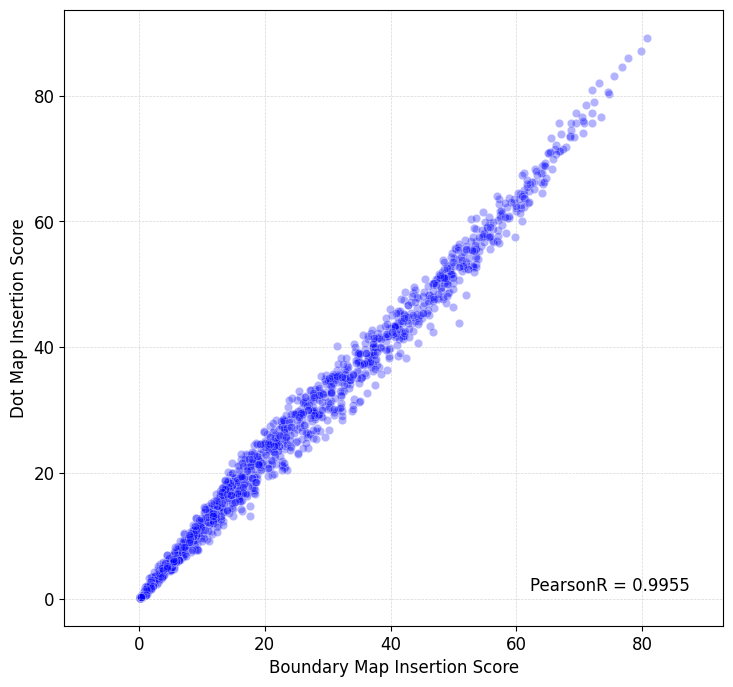

In [3]:
# Create a scatter plot
plt.figure(figsize=(8.5, 8))
plt.scatter(df["SCD_B"], df["SCD_D"], alpha=0.3, edgecolors='w', linewidth=0.5, color='blue') 
# here, SCD = insertion score, stands for "squared contact difference"
plt.ylabel('Dot Map Insertion Score')
plt.xlabel('Boundary Map Insertion Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)
plt.axis('equal')

# Calculate the Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(df["SCD_B"], df["SCD_D"])
rounded_pearson_corr = round(pearson_corr, 4)

# Add Pearson correlation coefficient in the lower right corner
plt.text(0.95, 0.05, f'PearsonR = {rounded_pearson_corr}', horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes, fontsize=12, color='black')

# plt.savefig("./plots/boundary_dot_insertion_score.pdf", format="pdf", bbox_inches="tight")

### Boundary score vs. dot cross-score

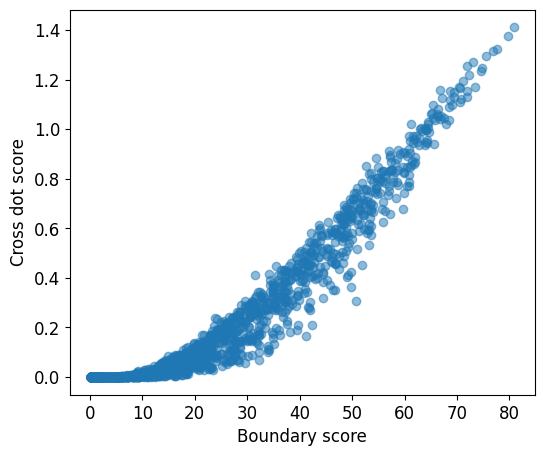

In [4]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["cross-score"], alpha=0.5)

ax.set_xlabel("Boundary score")
ax.set_ylabel("Cross dot score")

plt.show()

### Boundary score vs. dot-score

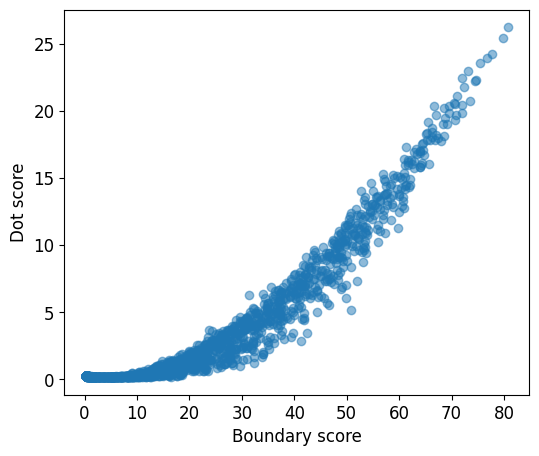

In [5]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["dot-score"], alpha=0.5)

ax.set_xlabel("Boundary score")
ax.set_ylabel("Dot score")

plt.show()

### Boundary score vs. x-score

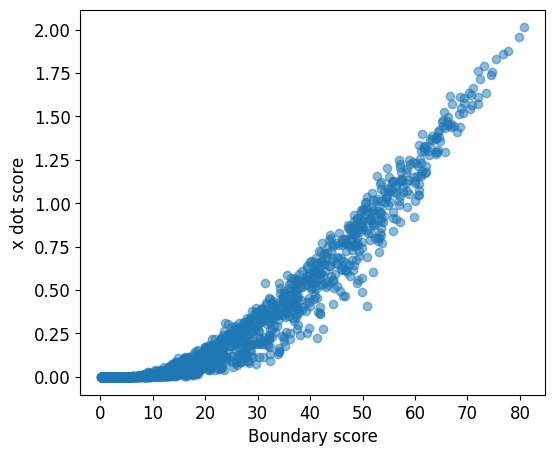

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))

scatter = ax.scatter(df["SCD_B"], df["x-score"], alpha=0.5)

ax.set_xlabel("Boundary score")
ax.set_ylabel("x dot score")

plt.show()

### Scatterplot with histograms on the margins

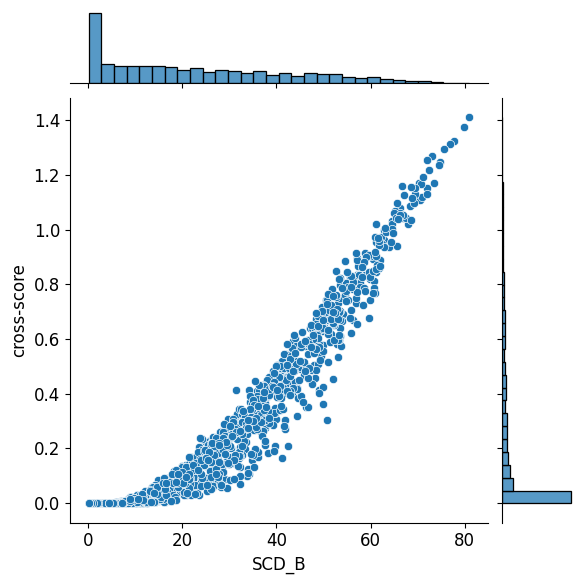

In [7]:
sns.jointplot(
    x=df["SCD_B"], y=df["cross-score"], marginal_kws=dict(bins=30, fill=True),
)

### Picking a representative (visually) set of points to plot the maps

In [8]:
picked_indiced = [1326, 412, 368, 101, 10, 112]
picked_for_plotting = df.loc[picked_indiced].reset_index(drop=True)

# saving
# picked_for_plotting.to_csv("picked_for_plotting.tsv", sep="\t", index=False)

picked_colors = ["#fef0d9", "#fdbb84", "#fc8d59", "#ef6548", "#d7301f", "#990000"]

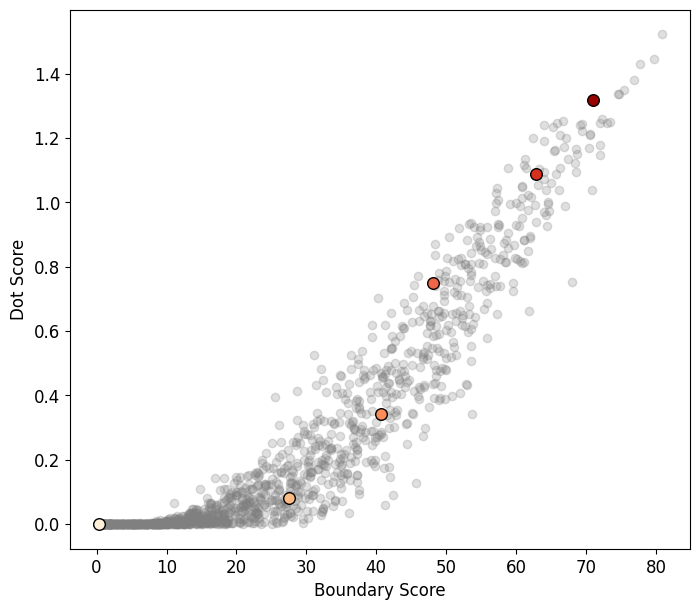

In [9]:
fig, ax = plt.subplots(figsize=(8,7))

scatter = ax.scatter(df["SCD_B"], df["cross-score_m0"], c = "gray", alpha=0.25)

for index in picked_indiced:
    color_ind = picked_indiced.index(index)
    scatter = ax.scatter(df["SCD_B"].iloc[index], df["cross-score_m0"].iloc[index], c=picked_colors[color_ind], s=70, edgecolors='black')

ax.set_xlabel("Boundary Score")
ax.set_ylabel("Dot Score")

# plt.savefig("./plots/boundary_dot_score_scatter.pdf", format="pdf", bbox_inches="tight")
plt.show()